In [23]:
import numpy as np
from scipy.stats import rankdata
from scipy.special import softmax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
from scipy.stats import rankdata

def mrrs(out, labels):
#     print(out,labels)
    outputs = np.argmax(out,axis=1)
    mrr = 0.0 
    last = [0,0,0,0,0,0,0]
    for label,ranks in zip(labels,out):
        ranks = rankdata(ranks*-1)
        rank = ranks[label]
#         print(rank,ranks)
        last[int(rank)]+=1
        mrr+=1/rank
    print("Total @ Last:",last)
    return mrr/len(labels)

def precision_at(out,labels,prank=1):
    count = 0
    for label,ranks in zip(labels,out):
        ranks = rankdata(ranks*-1)
        rank = ranks[label]
#         print(rank,ranks)
        if rank <= prank:
            count+=1
    return count/len(labels)

def mrrwrapper(qid2c,qid2indexmap,preds_prob):
    labels = []
    out = []
    for qid in qid2c.keys():
        scores = []
        for ix in qid2indexmap[qid]:
            if len(scores) < 6:
                scores.append(preds_prob[ix][1])
        if len(scores) < 6:
            continue
        out.append(scores)
        labels.append(int(qid2c[qid]))
    return mrrs(np.array(out),labels),precision_at(np.array(out),labels,1),precision_at(np.array(out),labels,3)

def mrrVisualization(n_trainSamples,mrrScore):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,mrrScore,label='MRR vs TrainData',marker='x')
    plt.title("Scores vs TrainData")
    plt.legend()
    plt.xlabel("TrainData")
    plt.ylabel("Scores")
    fig.savefig("NN_Tokens_Linear_Mrr.png")
    plt.show()
    

def precisionVisualization(n_trainSamples,precisionAt1,precisionAt3):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,precisionAt1,label='Precision@1 vs TrainData',marker='x')
    ax.plot(n_trainSamples,precisionAt3,label='Precision@3 vs TrainData',marker='o')
    plt.title("Precisions vs TrainData")
    plt.legend()
    plt.xlabel("TrainData")
    plt.ylabel("Precisions")
    fig.savefig("NN_Tokens_Linear_Precision.png")
    plt.show()

def load_ranking(fname):
    return pickle.load(open("/scratch/pbanerj6/sml-dataset/ranking_"+fname+".p","rb"))

def accuracyVisualization(n_trainSamples,valAccuracy,testAccuracy):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,testAccuracy,label='TestAccuracy vs TrainData',marker='o')
    ax.plot(n_trainSamples,valAccuracy,label='ValAccuracy vs TrainData',marker='.')
    plt.title("Scores vs TrainData")
    plt.legend()
    plt.xlabel("TrainData")
    plt.ylabel("Scores")
    fig.savefig("NN_Tokens_Linear_Accuracy.png")
    #plt.show()

qid2c,qid2indexmap = load_ranking("test")

In [3]:
filename = "/scratch/pbanerj6/sml-class-bert-simple-base-1e5-r1-small-128/test.tsv-score.tsv"

valnames = ["/scratch/pbanerj6/sml-class-bert-simple-base-1e5-r1-small-128/val.tsv-score.tsv",
           "/scratch/pbanerj6/sml-class-bert-large-1e5-r1-small-128/val.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-simple-1e5-r1-small-128/val.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128/val.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-cnn-5e6-r1-small-128/val.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-large-cnn-1e5-r1-small-128/val.tsv-score.tsv",
           ]

testnames = ["/scratch/pbanerj6/sml-class-bert-simple-base-1e5-r1-small-128/test.tsv-score.tsv",
           "/scratch/pbanerj6/sml-class-bert-large-1e5-r1-small-128/test.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-simple-1e5-r1-small-128/test.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128/test.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-cnn-5e6-r1-small-128/test.tsv-score.tsv",
            "/scratch/pbanerj6/sml-class-bert-large-cnn-1e5-r1-small-128/test.tsv-score.tsv",
           ]

def get_mrr(filename,qid2c,qid2indexmap):
    with open(filename,"r") as fd:
        lines = fd.readlines()
        preds = []
        for line in lines:
            line = line.strip().split("\t")
            pred = [0,float(line[-1])]
            preds.append(pred)
        return mrrwrapper(qid2c=qid2c,qid2indexmap=qid2indexmap,preds_prob=preds)


for filename1,filename2 in zip(valnames,testnames):
    print("Model:",filename1.split("/")[3])
    qid2c,qid2indexmap = load_ranking("val")
    print("Val\t",get_mrr(filename1,qid2c,qid2indexmap),)
    qid2c,qid2indexmap = load_ranking("test")
    print("Test\t",get_mrr(filename2,qid2c,qid2indexmap))

Model: sml-class-bert-simple-base-1e5-r1-small-128
Total @ Last: [0, 766, 320, 195, 104, 72, 43]
Val	 (0.692088888888891, 0.51, 0.854)
Total @ Last: [0, 719, 348, 192, 142, 63, 36]
Test	 (0.6740349206349232, 0.47933333333333333, 0.8386666666666667)
Model: sml-class-bert-large-1e5-r1-small-128
Total @ Last: [0, 748, 362, 175, 103, 67, 45]
Val	 (0.6890682539682561, 0.498, 0.856)
Total @ Last: [0, 730, 357, 204, 113, 61, 35]
Test	 (0.681633333333336, 0.486, 0.8606666666666667)
Model: sml-class-bert-simple-1e5-r1-small-128
Total @ Last: [0, 756, 319, 167, 108, 80, 70]
Val	 (0.6836481481481497, 0.5033333333333333, 0.828)
Total @ Last: [0, 724, 310, 190, 120, 88, 68]
Test	 (0.6674925925925951, 0.4826666666666667, 0.816)
Model: sml-class-bert-simple-large-1e5-r1-small-128
Total @ Last: [0, 806, 306, 173, 104, 68, 43]
Val	 (0.7085111111111126, 0.536, 0.8566666666666667)
Total @ Last: [0, 767, 313, 179, 112, 75, 54]
Test	 (0.689888888888891, 0.5106666666666667, 0.8393333333333334)
Model: sml-cl

In [7]:
med_val = ["/scratch/pbanerj6/sml-class-bert-2e6-r1-med/val.tsv-score.tsv","/scratch/pbanerj6/sml-class-bert-large-v2-5e6-full/val.tsv-score.tsv","/scratch/pbanerj6/sml-class-bert-large-cnn-full/val.tsv-score.tsv"]
med_test = ["/scratch/pbanerj6/sml-class-bert-2e6-r1-med/test.tsv-score.tsv","/scratch/pbanerj6/sml-class-bert-large-v2-5e6-full/test.tsv-score.tsv","/scratch/pbanerj6/sml-class-bert-large-cnn-full/test.tsv-score.tsv"]
for filename1,filename2 in zip(med_val,med_test):
    print("Model:",filename1.split("/")[3])
    qid2c,qid2indexmap = pickle.load(open("../xgboost/ranking_val_med.p","rb"))
    print("Val\t",get_mrr(filename1,qid2c,qid2indexmap))
    qid2c,qid2indexmap = pickle.load(open("../xgboost/ranking_test_med.p","rb"))
    print("Test\t",get_mrr(filename2,qid2c,qid2indexmap))

Model: sml-class-bert-2e6-r1-med
Total @ Last: [0, 28342, 11046, 5482, 2894, 1553, 811]
Val	 (0.7352362713358449, 0.5650734120651133, 0.8950486753909991)
Total @ Last: [0, 28794, 10824, 5277, 2878, 1565, 790]
Test	 (0.7405171016166736, 0.5739506862432173, 0.8955872965209065)
Model: sml-class-bert-large-v2-5e6-full
Total @ Last: [0, 29267, 10890, 5176, 2630, 1428, 737]
Val	 (0.7480311355311282, 0.5835062240663901, 0.904304979253112)
Total @ Last: [0, 29597, 10742, 5008, 2670, 1379, 732]
Test	 (0.7519528261618383, 0.5899696776252793, 0.9046042132141717)
Model: sml-class-bert-large-cnn-full
Total @ Last: [0, 29221, 10961, 5147, 2658, 1424, 717]
Val	 (0.7476860190293697, 0.5825885732524737, 0.9042251835301628)
Total @ Last: [0, 29487, 10860, 5155, 2567, 1374, 685]
Test	 (0.7512392733476629, 0.5878351420363869, 0.9076563996169805)


In [35]:

# sml-class-bert-1e5-r1-small-128/eval_results.txt:eval_accuracy_2_Test = 0.7072666666666667  -- CNN - Done
# sml-class-bert-1e5-r1-small-128/eval_results.txt:eval_accuracy_2_Val = 0.7148666666666667 -- CNN - Done

# sml-class-bert-large-1e5-r1-small-128/eval_results.txt:eval_accuracy_1_Test = 0.7211333333333333 -- SEQCLASS - Done
# sml-class-bert-large-1e5-r1-small-128/eval_results.txt:eval_accuracy_1_Val = 0.7240666666666666 -- SEQCLASS


# sml-class-bert-2e6-r1-med/eval_results.txt:eval_accuracy_4_Test = 0.7545613048144557 - SEQCLASS  - Done
# sml-class-bert-2e6-r1-med/eval_results.txt:eval_accuracy_4_Val = 0.7510662660937356 -  SEQCLASS  - Done


# sml-class-bert-cnn-5e6-r1-small-128/eval_results.txt:eval_accuracy_4_Test = 0.7078 -- CNN 
# sml-class-bert-cnn-5e6-r1-small-128/eval_results.txt:eval_accuracy_4_Val = 0.7088 -- CNN 

# sml-class-bert-large-cnn-1e5-r1-small-128/eval_results.txt:eval_accuracy_2_Test = 0.7110666666666666
# sml-class-bert-large-cnn-1e5-r1-small-128/eval_results.txt:eval_accuracy_2_Val = 0.7258



# /scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128     eval_accuracy_1_Test = 0.7131333333333333
# /scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128     eval_accuracy_1_Val = 0.7310666666666666

# /scratch/pbanerj6/sml-class-bert-simple-1e5-r1-small-128     eval_accuracy_2_Test = 0.7076
# /scratch/pbanerj6/sml-class-bert-simple-1e5-r1-small-128     eval_accuracy_2_Val = 0.7110666666666666




# Type			Base 	Large
# Models

# Simple 			Done 	Done 
# SeqClass        		Done 
# CNN 			Done	Done 

# python run_scorer.py --data_dir ../datasets/ranking/small --fname val.tsv --bert_model bert-base-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-cnn-5e6-r1-small-128 --modeltype cnn2
# python run_scorer.py --data_dir ../datasets/ranking/small --fname test.tsv --bert_model bert-base-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-cnn-5e6-r1-small-128 --modeltype cnn2


# python run_scorer.py --data_dir ../datasets/ranking/small --fname val.tsv --bert_model bert-large-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-large-cnn-1e5-r1-small-128 --modeltype cnn
# python run_scorer.py --data_dir ../datasets/ranking/small --fname test.tsv --bert_model bert-large-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-large-cnn-1e5-r1-small-128 --modeltype cnn

# python run_scorer.py --data_dir ../datasets/ranking/small --fname val.tsv --bert_model bert-base-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-simple-1e5-r1-small-128 --modeltype simple
# python run_scorer.py --data_dir ../datasets/ranking/small --fname test.tsv --bert_model bert-base-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-simple-1e5-r1-small-128 --modeltype simple

# python run_scorer.py --data_dir ../datasets/ranking/small --fname val.tsv --bert_model bert-large-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128  --modeltype simple
# python run_scorer.py --data_dir ../datasets/ranking/small --fname test.tsv --bert_model bert-large-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128  --modeltype simple


# python run_scorer.py --data_dir ../datasets/ranking-med/ --fname test.tsv --bert_model bert-large-cased --task_name obqa --output_dir /scratch/pbanerj6/sml-class-bert-large-v2-5e6-full --modeltype seqclass



In [26]:
cnn_folders = ["/scratch/pbanerj6/sml-class-cnn-large-100/","/scratch/pbanerj6/sml-class-cnn-large-1000/","/scratch/pbanerj6/sml-class-cnn-large-10000/","/scratch/pbanerj6/sml-class-cnn-large-20000/","/scratch/pbanerj6/sml-class-cnn-large-50000/","/scratch/pbanerj6/sml-class-bert-large-cnn-1e5-r1-small-128/"]
simple_folders = ["/scratch/pbanerj6/sml-class-simple-large-100/","/scratch/pbanerj6/sml-class-simple-large-1000/","/scratch/pbanerj6/sml-class-simple-large-10000/","/scratch/pbanerj6/sml-class-simple-large-20000/","/scratch/pbanerj6/sml-class-simple-large-50000/","/scratch/pbanerj6/sml-class-bert-simple-large-1e5-r1-small-128/"]
files = ["val.tsv-score.tsv","test.tsv-score.tsv"]

cnn_mrrs = []
cnn_p1s = []
cnn_p3s = []
simple_mrrs = []
simple_p1s = []
simple_p3s = []

def get_mrrs_for_nn(folders,mrs,p1s,p3s):
    for folder in folders:
        valfile = folder+files[0]
        print("Model:",valfile.split("/")[3])
        qid2c,qid2indexmap = load_ranking("val")
        print("Val\t",get_mrr(valfile,qid2c,qid2indexmap))
        testfile = folder+files[1]
        qid2c,qid2indexmap = load_ranking("test")
        mrr_tups = get_mrr(testfile,qid2c,qid2indexmap)
        print("Test\t",mrr_tups)
        mrs.append(mrr_tups[0])
        p1s.append(mrr_tups[1])
        p3s.append(mrr_tups[2])
        
get_mrrs_for_nn(simple_folders,simple_mrrs,simple_p1s,simple_p3s)
get_mrrs_for_nn(cnn_folders,cnn_mrrs,cnn_p1s,cnn_p3s)

Model: sml-class-simple-large-100
Total @ Last: [0, 455, 342, 261, 170, 153, 119]
Val	 (0.5372386243386261, 0.30333333333333334, 0.7046666666666667)
Total @ Last: [0, 400, 362, 251, 218, 161, 108]
Test	 (0.5128989898989917, 0.26666666666666666, 0.6753333333333333)
Model: sml-class-simple-large-1000
Total @ Last: [0, 487, 316, 237, 210, 150, 100]
Val	 (0.5487339105339121, 0.32466666666666666, 0.6926666666666667)
Total @ Last: [0, 461, 330, 222, 224, 146, 117]
Test	 (0.5364545454545467, 0.30733333333333335, 0.6753333333333333)
Model: sml-class-simple-large-10000
Total @ Last: [0, 674, 330, 168, 151, 104, 73]
Val	 (0.6436777777777795, 0.4493333333333333, 0.7813333333333333)
Total @ Last: [0, 618, 347, 183, 145, 121, 86]
Test	 (0.6179666666666689, 0.41133333333333333, 0.7653333333333333)
Model: sml-class-simple-large-20000
Total @ Last: [0, 725, 317, 170, 117, 77, 94]
Val	 (0.6667000000000015, 0.4826666666666667, 0.808)
Total @ Last: [0, 670, 313, 175, 154, 98, 90]
Test	 (0.638610101010103

In [27]:
train_samples = [100,1000,10000,20000,50000,75000]
val_acc_cnn = [0.5000666666666667,0.5408,0.656,0.7002,0.7179333333333333,0.7258]
test_acc_cnn = [0.5088,0.5326,0.6498666666666667,0.6882,0.7127333333333333,0.7110666666666666]
val_acc_simple = [0.5378666666666667,0.6005333333333334,0.6343333333333333,0.6833333333333333,0.7203333333333334,0.7310666666666666]
test_acc_simple = [0.5332,0.5890666666666666,0.6214666666666666,0.6686666666666666,0.7137333333333333,0.7131333333333333]

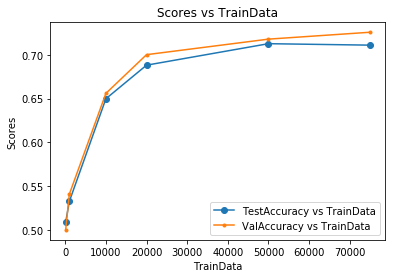

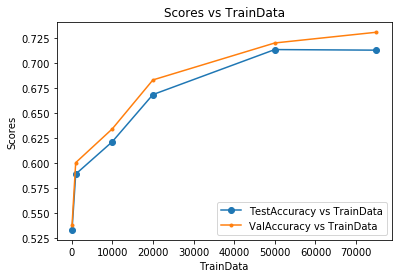

In [28]:
accuracyVisualization(train_samples,val_acc_cnn,test_acc_cnn)
accuracyVisualization(train_samples,val_acc_simple,test_acc_simple)

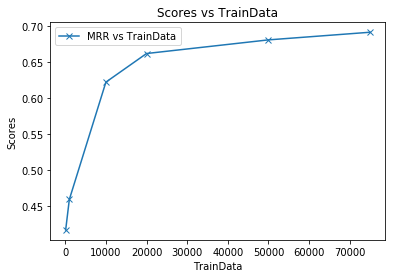

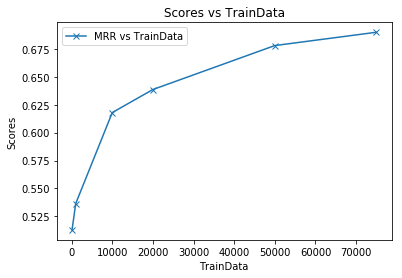

In [29]:
mrrVisualization(train_samples,cnn_mrrs)
mrrVisualization(train_samples,simple_mrrs)

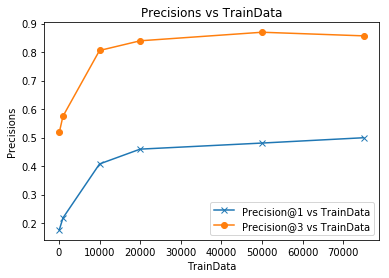

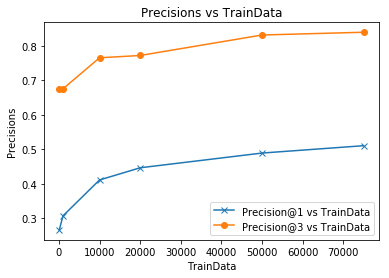

In [30]:
precisionVisualization(train_samples,cnn_p1s,cnn_p3s)
precisionVisualization(train_samples,simple_p1s,simple_p3s)

In [31]:
nn_val_accuracies,nn_test_accuracies,nn_mrr_vals,nn_p1s,nn_p3s = ([0.5985333333333334,0.6282666666666666,0.647,0.6515333333333333,0.6595333333333333,0.6582666666666667],
[0.5762,
0.6218666666666667,
0.6497333333333334,
0.657,
0.6596,
0.6610666666666667],
[0.5232777777777788,
0.5729333333333361,
0.5899333333333352,
0.5948444444444466,
0.6036238095238123,
0.6097349206349232],
[0.286, 0.34, 0.356, 0.362, 0.38266666666666665, 0.388],
[0.6766666666666666,
0.7473333333333333,
0.7786666666666666,
0.788,
0.7833333333333333,
0.7926666666666666])

In [39]:
def mrrVisualization2(n_trainSamples,pScoreNN,pScoreSimple,pScoreCNN,p):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,pScoreNN,label=p+' NN vs TrainData',marker='x')
    ax.plot(n_trainSamples,pScoreSimple,label=p+' BERT-Simple vs TrainData',marker='o')
    ax.plot(n_trainSamples,pScoreCNN,label=p+' BERT-CNN vs TrainData',marker='.')    
    plt.title("Scores vs TrainData")
    plt.legend()
    plt.xlabel("TrainData")
    plt.ylabel("Scores")
    fig.savefig("Comp_Mrr.png")
    plt.show()
    

def precisionVisualization2(n_trainSamples,pScoreNN,pScoreSimple,pScoreCNN,p="Precision@1"):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,pScoreNN,label=p+' NN vs TrainData',marker='x')
    ax.plot(n_trainSamples,pScoreSimple,label=p+' BERT-Simple vs TrainData',marker='o')
    ax.plot(n_trainSamples,pScoreCNN,label=p+' BERT-CNN vs TrainData',marker='.')
    plt.title("Precisions vs TrainData")
    plt.legend()
    plt.xlabel("TrainData")
    plt.ylabel("Precisions")
    fig.savefig(p+"_Com_Precision.png")
    plt.show()
    
def accuracyVisualization2(n_trainSamples,pScoreNN,pScoreSimple,pScoreCNN,p="Val"):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(n_trainSamples,pScoreNN,label=p+' NN vs TrainData',marker='x')
    ax.plot(n_trainSamples,pScoreSimple,label=p+'BERT vs TrainData',marker='o')
    ax.plot(n_trainSamples,pScoreCNN,label=p+' BERT-CNN vs TrainData',marker='.')
    plt.title("Scores vs TrainData")
    plt.legend()
    plt.xlabel("TrainData")
    plt.ylabel("Scores")
    fig.savefig(p+"_Com_Accuracy.png")

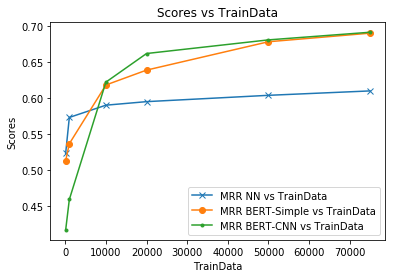

In [40]:
mrrVisualization2(train_samples,nn_mrr_vals,simple_mrrs,cnn_mrrs,p="MRR")

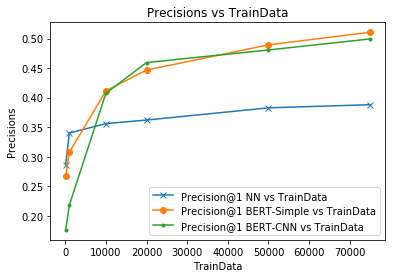

In [41]:
precisionVisualization2(train_samples,nn_p1s,simple_p1s,cnn_p1s,p="Precision@1")

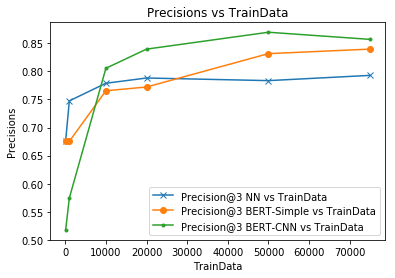

In [42]:
precisionVisualization2(train_samples,nn_p3s,simple_p3s,cnn_p3s,p="Precision@3")

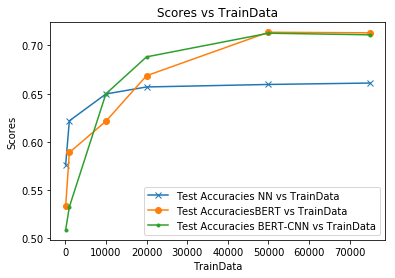

In [43]:
accuracyVisualization2(train_samples,nn_test_accuracies,test_acc_simple,test_acc_cnn,p="Test Accuracies")

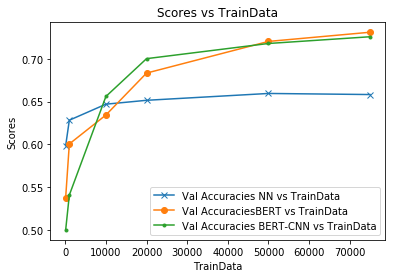

In [44]:
accuracyVisualization2(train_samples,nn_val_accuracies,val_acc_simple,val_acc_cnn,p="Val Accuracies")